### aim: Code for figure WindLines

### date: 2023-03-22, 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


In [5]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]



the winds are remade with xarray forcing here: /gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/EXTRACT/wspdfromtauxtauy.py 

area averaged mean south of -30 wind timeseries is made in calculate_Winds_TOMforcing.py in intermediateCalculations

In [6]:
## these made in calculateUKESMmeanForcing.py

tdir = '/gpfs/data/greenocean/software/resources/windsProcessed'

wspd_1A = xr.open_dataset(f'{tdir}/wspd_1A_overwatermean-50N.nc')
wspd_1B = xr.open_dataset(f'{tdir}/wspd_1B_overwatermean-50N.nc')
wspd_2A = xr.open_dataset(f'{tdir}/wspd_2A_overwatermean-50N.nc')
wspd_2B = xr.open_dataset(f'{tdir}/wspd_2B_overwatermean-50N.nc')
wspd_3A = xr.open_dataset(f'{tdir}/wspd_3A_overwatermean-50N.nc')
wspd_3B = xr.open_dataset(f'{tdir}/wspd_3B_overwatermean-50N.nc')


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


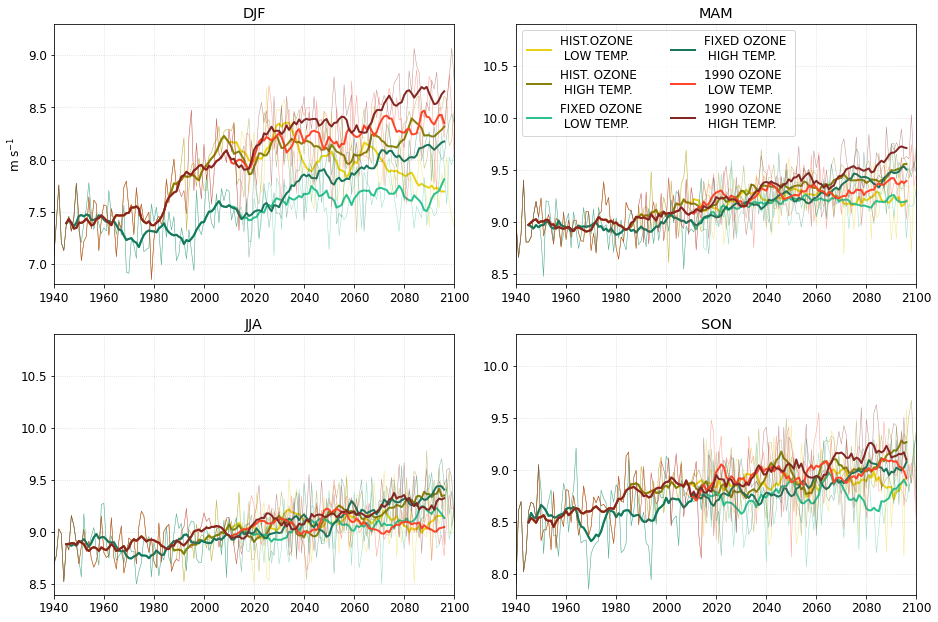

In [7]:


fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
ymi = [6.8, 8.4, 8.4, 7.8]
tits = ['DJF','MAM','JJA','SON']
for i in range(0,4):
    axs[i].set_title(tits[i])
    axs[0].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1940,2100])
    axs[1].legend(ncol = 2, fontsize = 12)
    axs[i].set_ylim([ymi[i], ymi[i]+2.5])
    axs[i].grid(color = 'grey', linestyle = ':', alpha = 0.3)
    axs[i].set_xlabel('')

#plt.suptitle('winds south of -30s, area averaged mean')
plt.tight_layout()
fig.savefig('./figs/Fig-wspd.jpg')

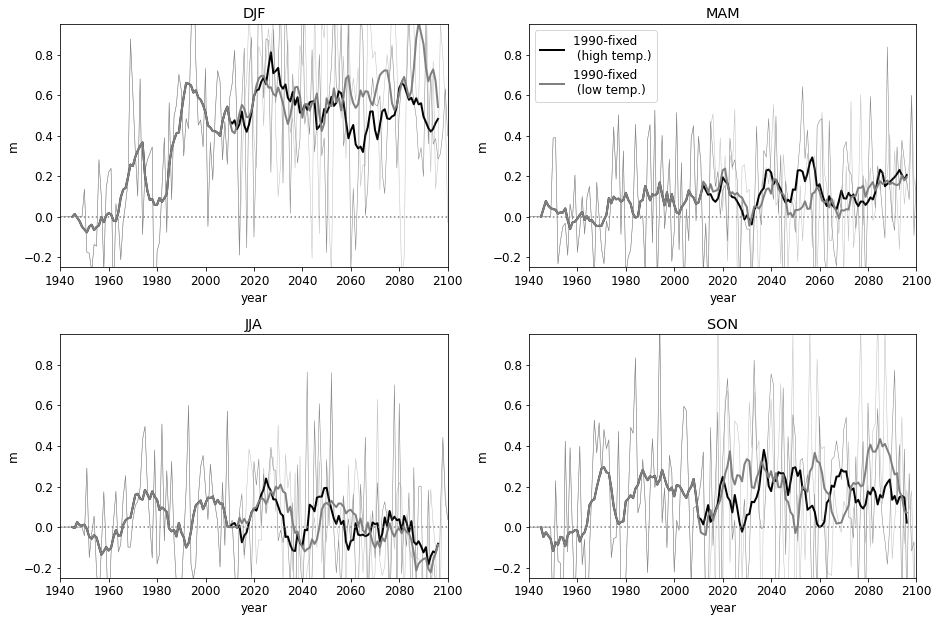

In [8]:
#wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
wspdset = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A)]
scens = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)']
cols = ['k','grey']
fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for x in range(0,2):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = cols[x], linewidth = 2, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = cols[x], linewidth = 2, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = cols[x], linewidth = 2, alpha = 1)
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = cols[x], linewidth = 2, alpha = 1)
    
tits = ['DJF','MAM','JJA','SON']
for i in range(0,4):
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('m')
    axs[i].set_xlim([1940,2100])
    axs[1].legend()
    axs[i].set_ylim([-0.25,0.95])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')

#plt.suptitle('effect of ozone on winds south of -30s, area averaged mean')
plt.tight_layout()
#fig.savefig('./figs/Fig-wspd_ozoneeffect.jpg')

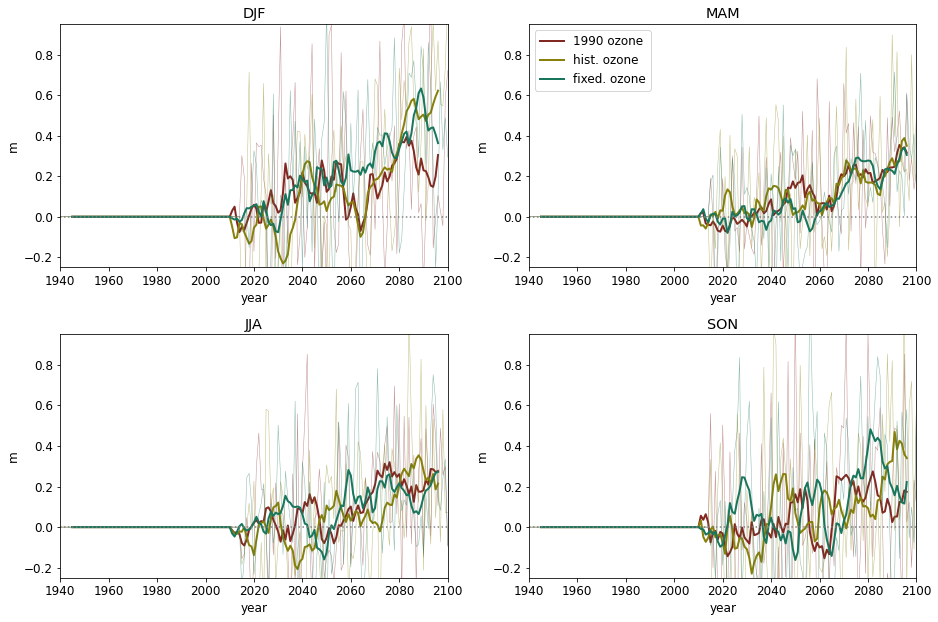

In [9]:

fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


wspdset = [(wspd_3B-wspd_3A), (wspd_1B-wspd_1A), (wspd_2B-wspd_2A)]
cols = [scendict['3B']['color'],scendict['1B']['color'],scendict['2B']['color']]
scens = ['1990 ozone', 'hist. ozone', 'fixed. ozone', ]
for x in range(0,3):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = cols[x], linewidth = 2, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = cols[x], linewidth = 2, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = cols[x], linewidth = 2, alpha = 1)
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = cols[x], linewidth = 2, alpha = 1)
    
tits = ['DJF','MAM','JJA','SON']
for i in range(0,4):
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('m')
    axs[i].set_xlim([1940,2100])
    axs[1].legend(loc = 'best')
    axs[i].set_ylim([-0.25,0.95])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')


#plt.suptitle('effect of temperature on winds south of -30s, area averaged mean')
plt.tight_layout()
#fig.savefig('./figs/Fig-wspd_ozoneeffect.jpg')

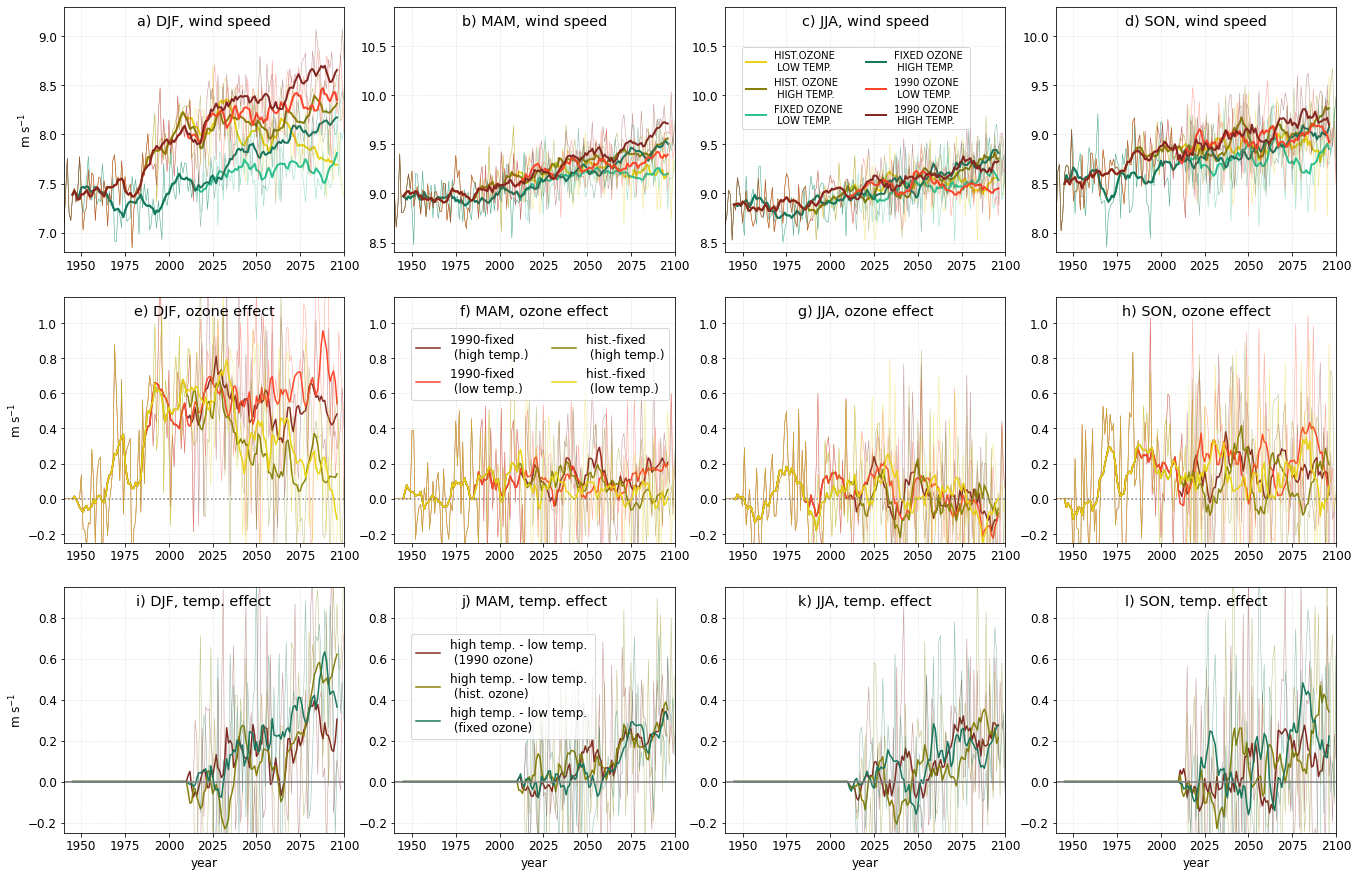

In [15]:
tlw = 1.5 #linewidth
fact = 1.9

fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

#####
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
ymi = [6.8, 8.4, 8.4, 7.8]
tits = ['a) DJF, wind speed','b) MAM, wind speed','c) JJA, wind speed','d) SON, wind speed']
for i in range(0,4):
    axs[i].set_title(tits[i], y = 0.90)
    axs[0].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1940,2100])
    #axs[1].legend(ncol = 2, fontsize = 10)
    axs[2].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)
    axs[i].set_ylim([ymi[i], ymi[i]+2.5])

    axs[i].set_xlabel('')


##### ozone effect
ind = 4
wspdset = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]
scens = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols = ['k','grey']
cols = ['#822722', '#FF462B', '#87800A', '#E8D215']


for x in range(0,4):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
tits = ['e) DJF, ozone effect','f) MAM, ozone effect','g) JJA, ozone effect','h) SON, ozone effect']

for i in range(0+ind,4+ind):
    axs[i].set_title(tits[i-ind], y = 0.90)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1940,2100])
    axs[1+ind].legend(loc = (0.06, 0.58), ncol = 2)
    axs[i].set_ylim([-0.25,1.15])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')
    axs[i].set_xlabel('')

#### temperature effect
ind = 8
wspdset = [(wspd_3B-wspd_3A), (wspd_1B-wspd_1A), (wspd_2B-wspd_2A)]
cols = [scendict['3B']['color'],scendict['1B']['color'],scendict['2B']['color']]
scens = ['high temp. - low temp. \n (1990 ozone)', 'high temp. - low temp. \n (hist. ozone)', 'high temp. - low temp. \n (fixed ozone)', ]
for x in range(0,3):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)

tits = ['i) DJF, temp. effect','j) MAM, temp. effect','k) JJA, temp. effect','l) SON, temp. effect']
for i in range(0+ind,4+ind):

    axs[i].set_title(tits[i-ind], y = 0.90)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1940,2100])
    axs[1+ind].legend(loc = (0.06, 0.38))
    axs[i].set_ylim([-0.25,0.95])
    axs[i].axhline(y=0, color = 'grey', linestyle = '-')

for i in range(0,12):
    axs[i].grid(color = 'grey', linestyle = ':', alpha = 0.3)

tsp = 0.18
plt.subplots_adjust(wspace=tsp, hspace=tsp)
# plt.tight_layout()
# fig.savefig('./figs/Fig-wspdcombined.jpg')
plt.savefig("./figs/Fig-wspdcombined.jpg",
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0.1)

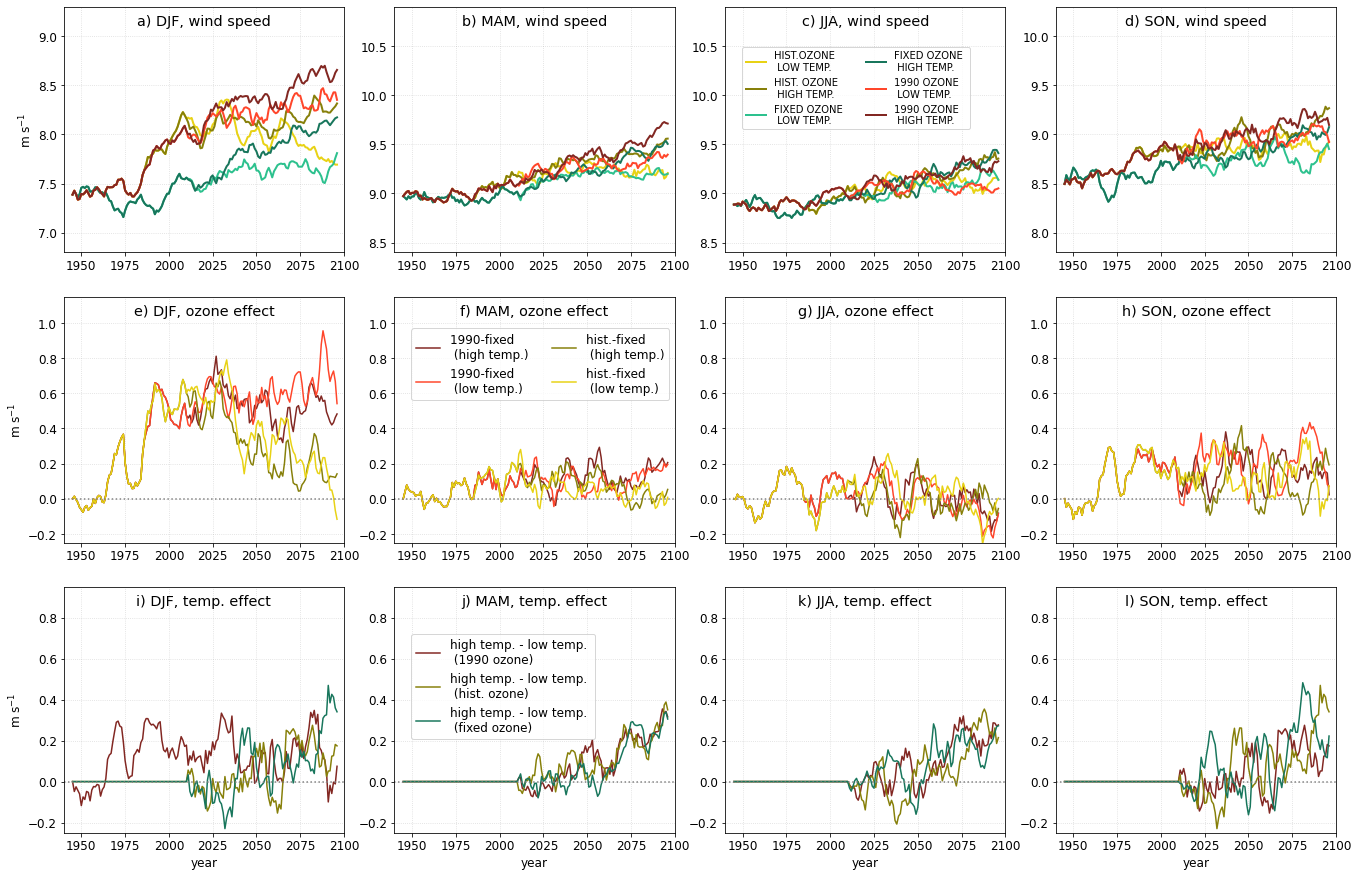

In [14]:
tlw = 1.5 #linewidth
fact = 1.9

fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

#####
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
ymi = [6.8, 8.4, 8.4, 7.8]
tits = ['a) DJF, wind speed','b) MAM, wind speed','c) JJA, wind speed','d) SON, wind speed']
for i in range(0,4):
    axs[i].set_title(tits[i], y = 0.90)
    axs[0].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1940,2100])
    #axs[1].legend(ncol = 2, fontsize = 10)
    axs[2].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)
    axs[i].set_ylim([ymi[i], ymi[i]+2.5])

    axs[i].set_xlabel('')


##### ozone effect
ind = 4
wspdset = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]
scens = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols = ['k','grey']
cols = ['#822722', '#FF462B', '#87800A', '#E8D215']


for x in range(0,4):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
tits = ['e) DJF, ozone effect','f) MAM, ozone effect','g) JJA, ozone effect','h) SON, ozone effect']

for i in range(0+ind,4+ind):
    axs[i].set_title(tits[i-ind], y = 0.90)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1940,2100])
    axs[1+ind].legend(loc = (0.06, 0.58), ncol = 2)
    axs[i].set_ylim([-0.25,1.15])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')
    axs[i].set_xlabel('')

#### temperature effect
ind = 8
wspdset = [(wspd_3B-wspd_3A), (wspd_1B-wspd_1A), (wspd_2B-wspd_2A)]
cols = [scendict['3B']['color'],scendict['1B']['color'],scendict['2B']['color']]
scens = ['high temp. - low temp. \n (1990 ozone)', 'high temp. - low temp. \n (hist. ozone)', 'high temp. - low temp. \n (fixed ozone)', ]
for x in range(0,3):
    tsc = scens[x]
    wspd = wspdset[x]
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    #tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw, alpha = 1, label = scens[x])
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw, alpha = 1)
    
    tv = wspd.wspd.sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw, alpha = 1)

tits = ['i) DJF, temp. effect','j) MAM, temp. effect','k) JJA, temp. effect','l) SON, temp. effect']
for i in range(0+ind,4+ind):

    axs[i].set_title(tits[i-ind], y = 0.90)
    axs[0+ind].set_ylabel('m s$^{-1}$')
    axs[i].set_xlim([1940,2100])
    axs[1+ind].legend(loc = (0.06, 0.38))
    axs[i].set_ylim([-0.25,0.95])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')

for i in range(0,12):
    axs[i].grid(color = 'grey', linestyle = ':', alpha = 0.3)

tsp = 0.18
plt.subplots_adjust(wspace=tsp, hspace=tsp)
# plt.tight_layout()
# fig.savefig('./figs/Fig-wspdcombined.jpg')
#/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG
plt.savefig("/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/Fig-windlines.jpg",
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0.1)